## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# read insurance data
data = pd.read_csv('insurance.csv')

# randomly create test and training dataset
np.random.seed(2)

train = data.sample(round(data.shape[0]*0.8)) # 80% i.e. 
test = data.drop(train.index)

### Data quality check
*By Philia Wang*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [3]:
#...Distribution of continuous variables...#
train.describe()

,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.081308,30.831514,1.093458,13454.331986
std,14.021963,6.134072,1.206722,12451.054091
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.400000,0.000000,4719.577175
50%,39.000000,30.590000,1.000000,9289.083100
75%,51.000000,34.848750,2.000000,17071.645350
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='children', ylabel='Count'>

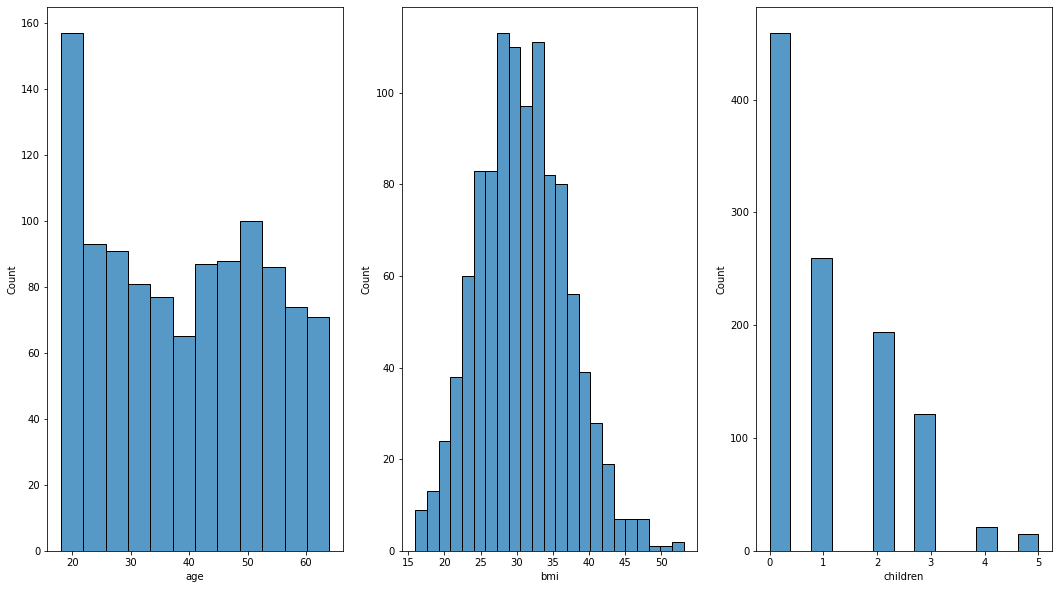

In [4]:
# Visualization of distribution of continuous variables
fig, ax = plt.subplots(1, 3, figsize=(18, 10))
sns.histplot(ax=ax[0], x = 'age', data = train)
sns.histplot(ax=ax[1], x = 'bmi', data = train)
sns.histplot(ax=ax[2], x = 'children', data = train)

In [5]:
#Qualitative variables in the data are 'sex' and 'region'
train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
#...Distribution of categorical variables...#
print('Smoker: ', train['smoker'].value_counts())
print('Region: ', train['region'].value_counts())

Smoker:  no     850
yes    220
Name: smoker, dtype: int64
Region:  southeast    291
northwest    262
northeast    259
southwest    258
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='Count'>

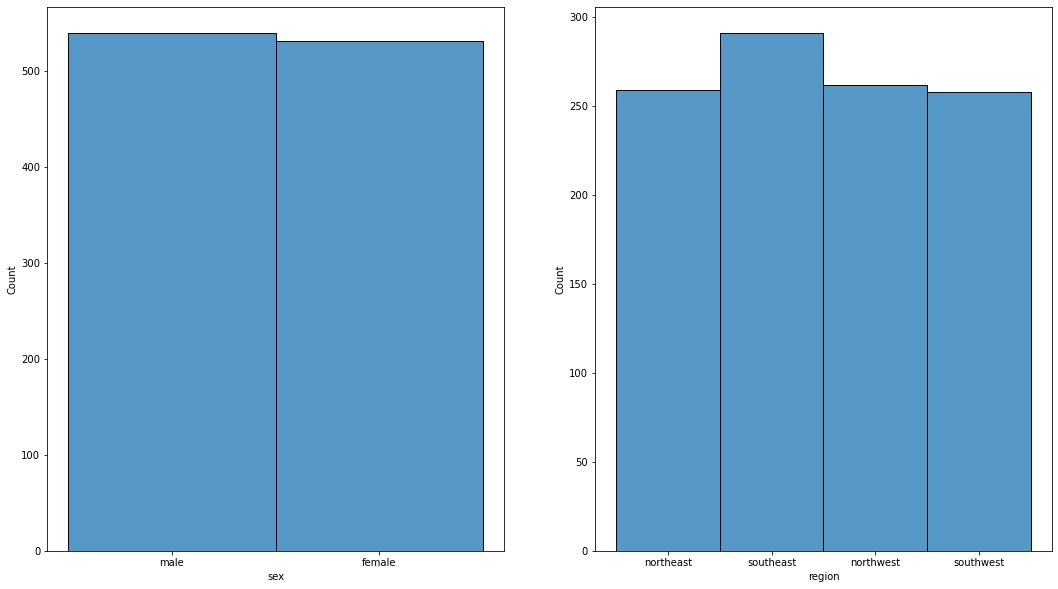

In [7]:
#Visualizing distribution of categorical variables
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
sns.histplot(ax=ax[0], x = 'sex', data = train)
sns.histplot(ax=ax[1], x = 'region', data = train)

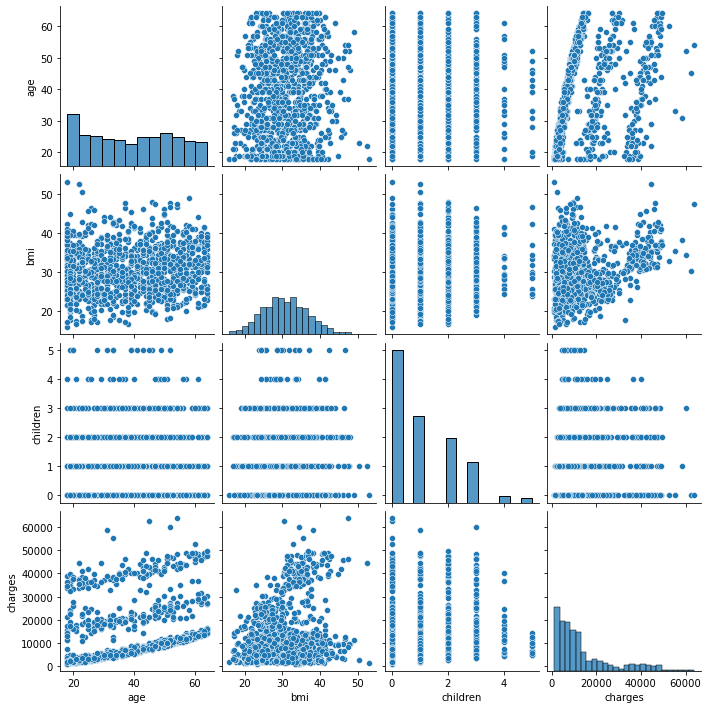

In [8]:
#...Association of the response with the predictors...#
sns.pairplot(train)

In [9]:
#Correlation between the quantitative predictors and the response
train.corrwith(train['charges'])

age         0.304118
bmi         0.220865
children    0.068611
charges     1.000000
dtype: float64

### Data cleaning
*By Xena Valenzuela*

From the data quality check we realized that:

1. Some of the columns that should have contained only numeric values, specifically <>, <>, and <> have special characters such as \*, #, %. We'll remove these characters, and convert the datatype of these columns to numeric.

2. Some of the columns have more than 60% missing values, and it is very difficult to impute their values, as the values seem to be missing at random with negligible association with other predictors. We'll remove such columns from the data.

3. The column `number_of_bedrooms` has some unreasonably high values such as 15. As our data consist of single-family homes in Evanston, we suspect that any value greater than 5 may be incorrect. We'll replace all values that are greater than 5 with an estimate obtained using the $K$-nearest neighbor approach.

4. The columns `house_price` has some unreasonably high values. We'll tag all values greater than 1 billion dollars as "potentially incorrect observation", to see if they distort our prediction / inference later on.

The code below implements the above cleaning.

In [10]:
#...Code with comments...#

### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [11]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [12]:
######-----------Shuffling the dataset for K-fold------------#########

In [13]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

By Natalie Khaoroptham

no     850
yes    220
Name: smoker, dtype: int64

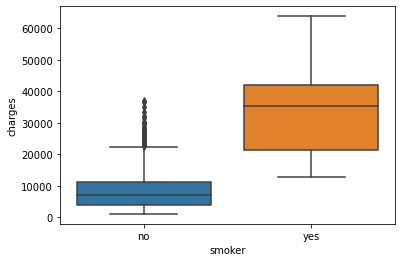

In [14]:
# Relationship between smoker vs charge

sns.boxplot(x = 'smoker', y = 'charges', data = train)
# Smokers have higher charges on average (median > 3.5k) and larger spread.

# smoker
train['smoker'].value_counts()

Intuitively, smoker is an important variable that will likely explain any patterns in the data. It may be useful to split the df into smoker vs non-smoker group to further explore such trends.

In [15]:
# Splitting dataset into smoker vs non-smoker
smoker_train = train[train.smoker == 'yes']
nonsmoker_train = train[train.smoker == 'no']

southeast    291
northwest    262
northeast    259
southwest    258
Name: region, dtype: int64

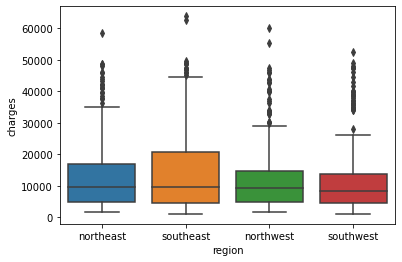

In [16]:
# Relationship between region vs charge

# boxplot of region vs charge
sns.boxplot(x = 'region', y = 'charges', data = train)
# All regions seem to have the same median charge, but vary in terms of spread.

# count the number of obs per region
train['region'].value_counts() # relatively equal representation of regions

<AxesSubplot:xlabel='age', ylabel='charges'>

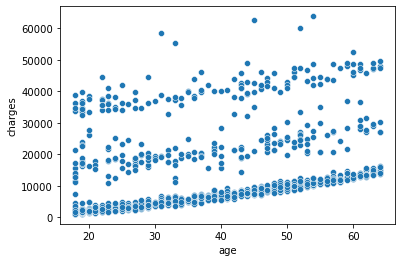

In [17]:
# Relationship between age vs charge

# scatterplot of age vs charge
sns.scatterplot(data = train, x = 'age', y = 'charges')

Overall, age vs charges has a positive linear relationship but oddly split into three separate lines with different start charges at age 0.

May be due to smoker variable: revisualize age vs. charge by smoker status

Non-smoker


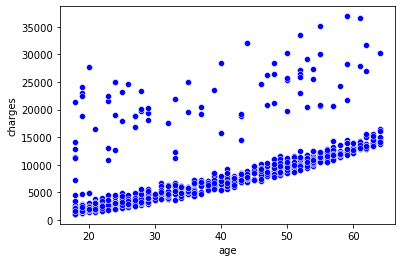

Smoker


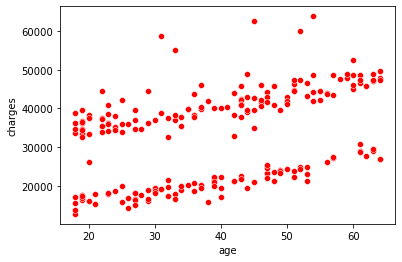

Combined


<AxesSubplot:xlabel='age', ylabel='charges'>

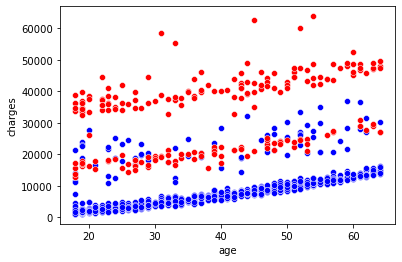

In [18]:
# Relationship between age vs charge

# Scatterplot of non-smoker age vs charge
print('Non-smoker')
sns.scatterplot(data = nonsmoker_train, x = 'age', y = 'charges', color = 'blue')
plt.show()

# Scatterplot of smoker age vs charge
print('Smoker')
sns.scatterplot(data = smoker_train, x = 'age', y = 'charges', color = 'red')
plt.show()

# Combined plot
print('Combined')
sns.scatterplot(data = nonsmoker_train, x = 'age', y = 'charges', color = 'blue')
sns.scatterplot(data = smoker_train, x = 'age', y = 'charges', color = 'red')

# Nonsmoker in blue + smoker data in red
    # Majority of nonsmokers have charges under 15,000 USD
        # small cluster of higher charged individuals (USD > 15k)
    # Majority of smokers have charges above nonsmokers but split into two lines (above $30k group and below $30k group)
        # lower charge line (under 30,000 USD for non-smokers overlaps with the cluster of higher charged obs in nonsmoker group)


In [19]:
# Look for difference in smoker age v charge graphs for above $30k group and below $30k group
over30 = smoker_train[smoker_train.charges > 30000]
under30 = smoker_train[smoker_train.charges < 30000]

# Summary stats tables for the two groups
over30_stats = pd.DataFrame(over30.describe())
under30_stats = pd.DataFrame(under30.describe())

# Take difference in summary stats, values above 0 suggest source of difference between teh groups
over30_stats - under30_stats

# bmi seems to be higher for group with charges over $30k

,age,bmi,children,charges
count,40.000000,40.000000,40.000000,40.000000
mean,1.821368,9.568047,0.014530,20802.479290
std,1.263115,1.686821,-0.013302,2170.999882
min,0.000000,0.570000,0.000000,18112.736700
25%,-2.000000,8.041250,0.000000,19298.050825
50%,5.000000,8.722500,0.000000,20732.897000
75%,3.250000,9.002500,0.000000,21539.399912
max,0.000000,22.655000,0.000000,34247.262410


In [20]:
over30_stats # mean bmi is in the extremely obese category

,age,bmi,children,charges
count,130.000000,130.000000,130.000000,130.000000
mean,39.576923,35.146769,1.092308,41477.992091
std,14.431267,4.792467,1.130591,6072.241752
min,18.000000,17.765000,0.000000,30942.191800
25%,25.000000,31.920000,0.000000,36982.535525
50%,42.000000,34.800000,1.000000,40812.375275
75%,51.000000,37.027500,2.000000,44917.015975
max,64.000000,52.580000,4.000000,63770.428010


In [21]:
under30_stats #mean bmi is in the overweight category

,age,bmi,children,charges
count,90.000000,90.000000,90.000000,90.000000
mean,37.755556,25.578722,1.077778,20675.512801
std,13.168153,3.105647,1.143892,3901.241870
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,23.878750,0.000000,17684.484700
50%,37.000000,26.077500,1.000000,20079.478275
75%,47.750000,28.025000,2.000000,23377.616062
max,64.000000,29.925000,4.000000,29523.165600


In [22]:
# Insight: smoker may be interacting with another variable to affect age's influence on charges
    # intuition: smoker and bmi may have a significant interaction
    # overweight individuals who smoke are more likely to develop health issues

<AxesSubplot:xlabel='bmi', ylabel='charges'>

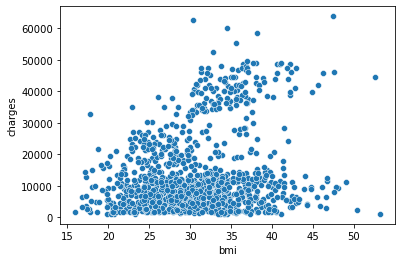

In [23]:
# Relationship between bmi vs charge
sns.scatterplot(data = train, x = 'bmi', y = 'charges')

# two clusters from graph, could be smoker vs non-smoker distinction

non-smoker


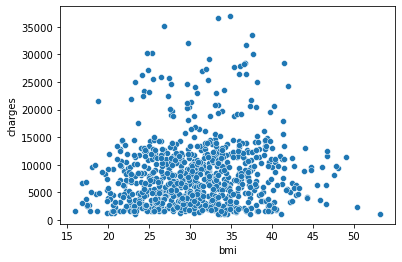

smoker


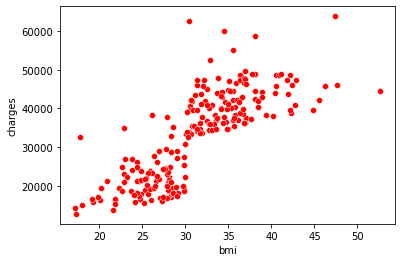

In [24]:
# Scatterplot of bmi vs age 
print('non-smoker')
sns.scatterplot(data = nonsmoker_train, x = 'bmi', y = 'charges')
plt.show()
print('smoker')
sns.scatterplot(data = smoker_train, x = 'bmi', y = 'charges', color = 'red')
plt.show()

# relationship between bmi and charges is less clear for non-smoker group
    # consider binning bmi to reduce noise 
# positive relationship between bmi and charges in smoker group

In [25]:
# bin bmi based on cdc cutoff for underweight, normal, overweight, obese, morbidly obese
binned_bmi = pd.cut(train['bmi'], [0,18.5,25,30,35,60], right = False, retbins = True)
bins = [0,18.5,25,30,35,60]


train['bmi_binned'] = pd.cut(data['bmi'], bins = bins, right = False)
test['bmi_binned'] = pd.cut(data['bmi'], bins = bins, right = False)

<AxesSubplot:xlabel='bmi_binned', ylabel='charges'>

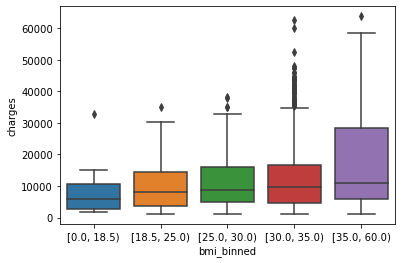

In [26]:
# boxplot of binned bmi
sns.boxplot(data = train, x = 'bmi_binned', y = 'charges')

# seems like the median charge increases with higher bmi range

<AxesSubplot:xlabel='children', ylabel='charges'>

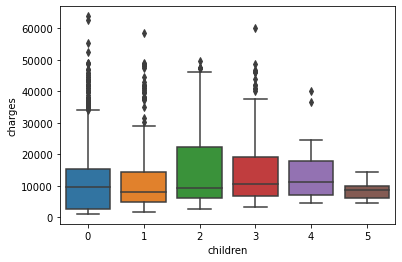

In [27]:
# Relationship between children vs. charges
sns.boxplot(data = train, x = 'children', y = 'charges')

# median charges are all around the same level at $10k
# 2-4 children have marginally higher charges than other groups

<AxesSubplot:xlabel='sex', ylabel='charges'>

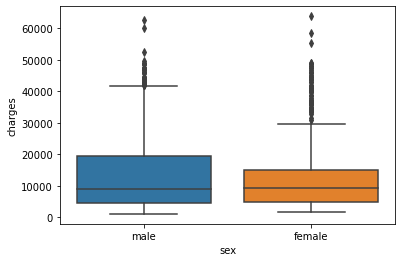

In [28]:
# Relationship between sex vs. charges
sns.boxplot(data = train, x = 'sex', y = 'charges')

# median charges are all around the same level at $10k, males have higher spread of values

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [29]:
def var_transform(data):
    binned_bmi = pd.cut(train['bmi'], [0,18.5,25,30,35,60], right = False, retbins = True)
    bins = [0,18.5,25,30,35,60]
    print(bins)
    data['bmi_binned'] = pd.cut(data['bmi'], bins = bins, right = False)
    
    return data

train_binned = var_transform(train)
test_binned = var_transform(test)

[0, 18.5, 25, 30, 35, 60]
[0, 18.5, 25, 30, 35, 60]


### Attempt with stratified data

by Natalie Khaoroptham

In [39]:
# stratified training and test set by age
train_strata = data.groupby('age', group_keys=False).apply(lambda x: x.sample(frac=0.8)) #80% train
test_strata = data.drop(train_strata.index) #20% test
 
# add bmi_binned to stratified training

train_strata = var_transform(train_strata)

test_strata = var_transform(test_strata)

[0, 18.5, 25, 30, 35, 60]
[0, 18.5, 25, 30, 35, 60]


In [44]:
# Notice from original model, residual plot shows nonlinear relationship between charge and age (looks parabolic)

# Transform age 
#df = train, formula = 'charges ~ age + binned_bmi*smoker + children + region'

ols_object = smf.ols(formula = 'charges ~ I(age**2) + bmi_binned*smoker  + sex + children + region', data = train)
model = ols_object.fit()
print(model.summary())

#Stats
pred = model.predict(test_strata)

print('RMSE:',np.sqrt(((test_strata.charges - pred)**2).mean()))
print('RSE:', np.sqrt(model.mse_resid))
print('R2:', model.rsquared)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     474.6
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:46:31   Log-Likelihood:                -10512.
No. Observations:                1070   AIC:                         2.106e+04
Df Residuals:                    1054   BIC:                         2.113e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

<AxesSubplot:xlabel='region'>

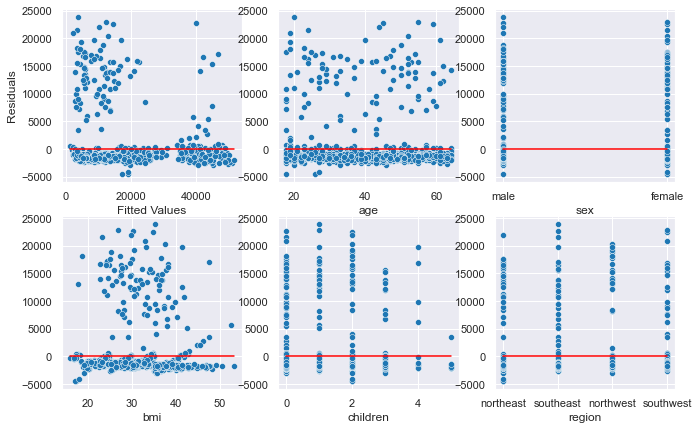

In [42]:
sns.set(font_scale = 1)
plt.rcParams["figure.figsize"] = (11, 7)
fig, axes = plt.subplots(2, 3)

sns.scatterplot(ax = axes[0][0], x = model.fittedvalues, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[0][0], x = [model.fittedvalues.min(), model.fittedvalues.max()], y = [0,0], color = 'red')
axes[0][0].set(xlabel = 'Fitted Values', ylabel = 'Residuals')

sns.scatterplot(ax = axes[0][1], x = train.age, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[0][1], x = [train.age.min(), train.age.max()], y = [0,0], color = 'red')

sns.scatterplot(ax = axes[0][2], x = train.sex, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[0][2], x = [train.sex.min(), train.sex.max()], y = [0,0], color = 'red')

sns.scatterplot(ax = axes[1][0], x = train.bmi, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[1][0], x = [train.bmi.min(), train.bmi.max()], y = [0,0], color = 'red')

sns.scatterplot(ax = axes[1][1], x = train.children, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[1][1], x = [train.children.min(), train.children.max()], y = [0,0], color = 'red')

sns.scatterplot(ax = axes[1][2], x = train.region, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[1][2], x = [train.region.min(), train.region.max()], y = [0,0], color = 'red')

# notice improvement in linearity assumption for age plot 

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [46]:
model = smf.ols(data = train_binned, formula = 'charges ~ I(age**2) + bmi_binned*smoker  + sex + children + region').fit()

In [47]:
# Use VIF to find collinearity

X = train[['age', 'children', 'bmi']]
X_backup = train[['age', 'children', 'bmi']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def vif(X):
    X = add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    for i in range(len(X.columns)):
        vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

    print(vif_data)
vif(X)

# very low collinearity between the numeric variables

    feature        VIF
0     const  31.659978
1       age   1.017096
2  children   1.004930
3       bmi   1.013455


### Outliers and Influential Points

***By Philia Wang***

In [48]:
out = model.outlier_test().reset_index().drop(['index'], axis = 1)
outlier_index = np.where(np.abs(out.student_resid)>3)[0].tolist()
outliers = train_binned.iloc[outlier_index]

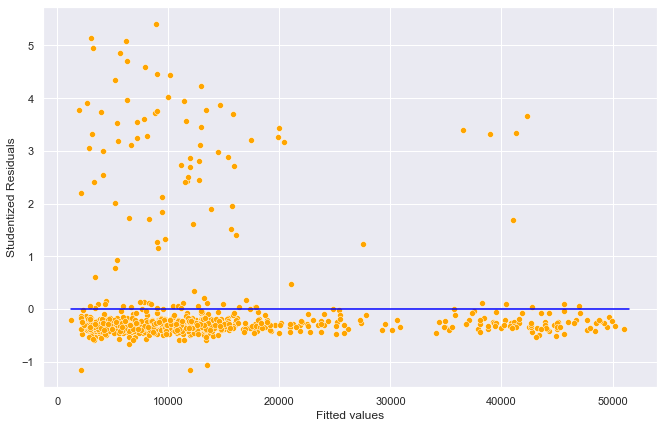

In [49]:
#Plotting studentized residuals vs fitted values
sns.scatterplot(x = (model.fittedvalues), y=(out.student_resid),color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')
sns.set_style("whitegrid")

In [50]:
#Number of points with absolute studentized residuals greater than 3
np.sum((np.abs(out.student_resid)>3))

53

There are 51 outliers in the model. Let's investigate further:

<AxesSubplot:xlabel='children', ylabel='count'>

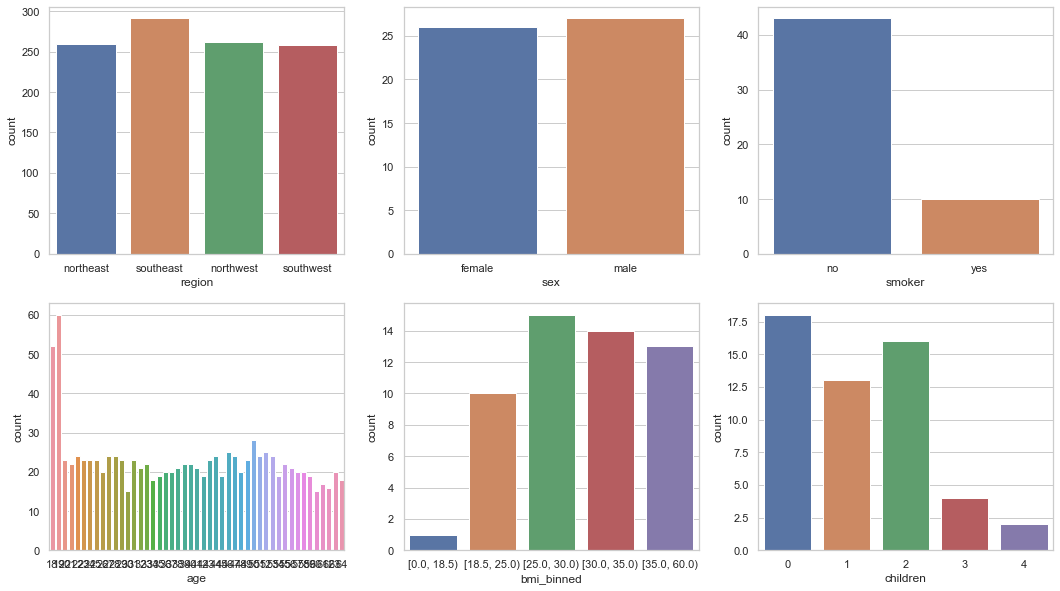

In [51]:
#visualizing patterns of qualitative predictors in outliers
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(ax=ax[0,0], x = 'region', data = train_binned)
sns.countplot(ax=ax[0,1], x = 'sex', data = outliers)
sns.countplot(ax=ax[0,2], x = 'smoker', data = outliers)

#visualizing patterns of quantitative predictors in outliers

sns.countplot(ax=ax[1,0], x = 'age', data = train_binned)
sns.countplot(ax=ax[1,1], x = 'bmi_binned', data = outliers)
sns.countplot(ax=ax[1,2], x = 'children', data = outliers)

There are no distinct trends in the predictors of outliers, except for smoker: Over 83% of the outliers are non-smokers. 

In [14]:
#Computing the leverage statistic for each observation
influence = model.get_influence()
leverage = influence.hat_matrix_diag

#Average leverage of points
average_leverage = (model.df_model+1)/model.nobs
high_leverage_threshold = 4*average_leverage

#Dropping influential points from data
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

#Number of points removed as they were influential
train_binned.shape[0]-train_filtered.shape[0]

1

There is only 1 influential point. Let's compare the RMSE and RSE for the models before and after removing this point.

In [16]:
#Model before removing influential observations
model = smf.ols(data = train_binned, formula = 'charges ~ age + sex + bmi_binned*smoker + children + region').fit()
print(model.summary())
# calculate rse
print('RSE: ', np.sqrt(model.mse_resid))
# calculate rmse
prediction = model.predict(test_binned)
print('RMSE: ', np.sqrt(((test_binned.charges - prediction)**2).mean()))

#Model after removing the influential observations
model = smf.ols(data = train_filtered, formula = 'charges ~ age + sex + bmi_binned*smoker + children + region').fit()
print(model.summary())
# calculate rse
print('RSE: ', np.sqrt(model.mse_resid))
# calculate rmse
prediction = model.predict(test_binned)
print('RMSE: ', np.sqrt(((test_binned.charges - prediction)**2).mean()))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     465.6
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:20:10   Log-Likelihood:                -10520.
No. Observations:                1070   AIC:                         2.107e+04
Df Residuals:                    1054   BIC:                         2.115e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

RMSE and RSE increase, and R-squared decreases after dropping the influnetial point. There is probably some predictors not being represented in the data. Thus, we will keep all outliers and the influential point in the training data.

# Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.